# AEGAN datasets benchmark

In [59]:
import pandas as pd
import os 
import sys
sys.path.append('/disk1/ariane/vscode/enzyme-tk/')
from enzymetk.sequence_search_blast import BLAST
from enzymetk.save_step import Save
from sciutil import SciUtil 

u = SciUtil()

# Basically want to run blast on each of the datasets and see how many get the correct active site
# We do this filtering first to remove them from the sequence set
data_dir = 'AEGAN_extracted_sequences/'
files = os.listdir(data_dir)

swissprot = pd.read_csv('data/reviewed_sprot_08042025.tsv', sep='\t')

def annotate_residue_from_uniprot(df):
    # Organise the active sites of these guys to be better
    active_sites = []
    active_site_residue_counts = []
    x = 0
    for act_site in df['Active site'].values:
        sites = []
        if isinstance(act_site, str):
            act_site = act_site.replace(" ", '')
            for act in act_site.split('ACT_SITE'):
                try:
                    sites.append(int(act.split(';')[0].replace(" ", '')) - 1) # Need to subtract 1 to make it fit with the fact that python is 0 encoded lol
                except:
                    x = 1
        if len(sites) != 0:
            active_sites.append('|'.join([str(s) for s in sites]))
            active_site_residue_counts.append(len(sites))
        else:
            active_sites.append('None')
            active_site_residue_counts.append(0)
    df['Residue'] = active_sites
    df['active_site_residue_counts'] = active_site_residue_counts
    return df
    
swissprot = annotate_residue_from_uniprot(swissprot)
swissprot = swissprot[swissprot['active_site_residue_counts'] > 0]
training_ids = set(pd.read_csv('data/AEGAN_real_training_set.txt', header=None)[0].values)
training_df = swissprot[swissprot['Entry'].isin(training_ids)]

u.dp(['Number of AEGAN training set:', len(training_df)])

--------------------------------------------------------------------------------
                      Number of AEGAN training set:	9888	                       
--------------------------------------------------------------------------------


# Make squidly predictions from the ensemble

Here we make the predictions based on the ensemble

HA superfamily: --- 780.4246592521667 seconds ---

In [62]:
import os 

files = [
 'HA_superfamily',
    'PC',
 'NN',
 'EF_superfamily',
 'EF_fold',
 'family_specific',
 'EF_family',] 
run_squidly = False
if run_squidly:
    times = []
    for f in files:
        fasta_label = f'{data_dir}{f}/{f}.fasta'
        start_time = time.time()
    
        os.system(f'squidly {fasta_label} esm2_t36_3B_UR50D data/ {f}_3B_1 --as-threshold 0.9 --lstm-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t36_3B_UR50D_2025-03-04/Scheme3_16000_1/LSTM/models/04-03-25_12-49_128_2_0.2_400_best_model.pth --cr-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t36_3B_UR50D_2025-03-04/Scheme3_16000_1/models/temp_best_model.pt')
        os.system(f'squidly {fasta_label} esm2_t36_3B_UR50D data/ {f}_3B_2 --as-threshold 0.9 --lstm-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t36_3B_UR50D_2025-03-04/Scheme3_16000_2/LSTM/models/04-03-25_14-09_128_2_0.2_400_best_model.pth --cr-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t36_3B_UR50D_2025-03-04/Scheme3_16000_2/models/temp_best_model.pt')
        os.system(f'squidly {fasta_label} esm2_t36_3B_UR50D data/ {f}_3B_3 --as-threshold 0.9 --lstm-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t36_3B_UR50D_2025-03-04/Scheme3_16000_3/LSTM/models/04-03-25_15-14_128_2_0.2_400_best_model.pth --cr-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t36_3B_UR50D_2025-03-04/Scheme3_16000_3/models/temp_best_model.pt')
        os.system(f'squidly {fasta_label} esm2_t36_3B_UR50D data/ {f}_3B_4 --as-threshold 0.9 --lstm-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t36_3B_UR50D_2025-03-04/Scheme3_16000_4/LSTM/models/04-03-25_17-28_128_2_0.2_400_best_model.pth --cr-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t36_3B_UR50D_2025-03-04/Scheme3_16000_4/models/temp_best_model.pt')
        os.system(f'squidly {fasta_label} esm2_t36_3B_UR50D data/ {f}_3B_5 --as-threshold 0.9 --lstm-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t36_3B_UR50D_2025-03-04/Scheme3_16000_5/LSTM/models/04-03-25_19-44_128_2_0.2_400_best_model.pth --cr-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t36_3B_UR50D_2025-03-04/Scheme3_16000_5/models/temp_best_model.pt')
        #os.system(f'squidly {fasta_label} esm2_t36_3B_UR50D data/AEGAN/ {f}_3B --as-threshold 0.99 --lstm-model-as up_to_date_aegan_18042025/3B/LSTM_3B.pth --cr-model-as up_to_date_aegan_18042025/3B/CL_3B.pt')
        print("--- %s seconds ---" % (time.time() - start_time))
        times.append(time.time() - start_time)
    print(times)

In [63]:
import os 

times_16 = {}

if run_squidly:
    for f in files:
        fasta_label = f'{data_dir}{f}/{f}.fasta'
        start_time = time.time()
    
        os.system(f'squidly {fasta_label} esm2_t48_15B_UR50D data/ {f}_15B_1 --as-threshold 0.9 --lstm-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t48_15B_UR50D_2025-03-03/Scheme3_16000_1/LSTM/models/03-03-25_13-38_128_2_0.2_400_best_model.pth --cr-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t48_15B_UR50D_2025-03-03/Scheme3_16000_1/models/temp_best_model.pt')
        os.system(f'squidly {fasta_label} esm2_t48_15B_UR50D data/ {f}_15B_2 --as-threshold 0.9 --lstm-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t48_15B_UR50D_2025-03-03/Scheme3_16000_2/LSTM/models/03-03-25_15-07_128_2_0.2_400_best_model.pth --cr-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t48_15B_UR50D_2025-03-03/Scheme3_16000_2/models/temp_best_model.pt')
        os.system(f'squidly {fasta_label} esm2_t48_15B_UR50D data/ {f}_15B_3 --as-threshold 0.9 --lstm-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t48_15B_UR50D_2025-03-03/Scheme3_16000_3/LSTM/models/03-03-25_16-50_128_2_0.2_400_best_model.pth --cr-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t48_15B_UR50D_2025-03-03/Scheme3_16000_3/models/temp_best_model.pt')
        os.system(f'squidly {fasta_label} esm2_t48_15B_UR50D data/ {f}_15B_4 --as-threshold 0.9 --lstm-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t48_15B_UR50D_2025-03-03/Scheme3_16000_4/LSTM/models/03-03-25_19-58_128_2_0.2_400_best_model.pth --cr-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t48_15B_UR50D_2025-03-03/Scheme3_16000_4/models/temp_best_model.pt')
        os.system(f'squidly {fasta_label} esm2_t48_15B_UR50D data/ {f}_15B_5 --as-threshold 0.9 --lstm-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t48_15B_UR50D_2025-03-03/Scheme3_16000_5/LSTM/models/03-03-25_21-31_128_2_0.2_400_best_model.pth --cr-model-as ../models/FinalModels/CLEANED_reproducing_AEGAN_benchmark_squidly_scheme_3_esm2_t48_15B_UR50D_2025-03-03/Scheme3_16000_5/models/temp_best_model.pt')
        #os.system(f'squidly {fasta_label} esm2_t36_3B_UR50D data/AEGAN/ {f}_3B --as-threshold 0.99 --lstm-model-as up_to_date_aegan_18042025/3B/LSTM_3B.pth --cr-model-as up_to_date_aegan_18042025/3B/CL_3B.pt')
        print("--- %s seconds ---" % (time.time() - start_time))
        times_16[f] = time.time() - start_time

# Now for each test set we want to look for the closest sequence in the AEGAN training set 

We do this for each of the sequneces in AEGAN.

In [65]:
# training_df.to_csv('data/AEGAN/AEGAN_training.csv')
# aegan_training_db = 'data/AEGAN/AEGAN_training.csv'

# for f in files:
#     try:
#         df = pd.read_csv(f'{data_dir}{f}/{f}.tsv', sep='\t')
#         entries = set(list(df['Entry'].values))
#         # Remove from SwissProt
#         # Now we're going to save this as a fasta file 
#         database_label = f'data/AEGAN/AEGAN_with_active_site_seqs_{f}.fasta'
#         with open(fasta_label, 'w+') as fout:
#             for entry, seq in training_df[['Entry', 'Sequence']].values:
#                 if entry not in entries:
#                     fout.write(f'>{entry}\n{seq}\n')
#         # Do blast on this dataset 

#         os.system(f'squidly {fasta_label} esm2_t36_3B_UR50D data/ AEGAN_{f} --database {aegan_training_db} --blast-threshold 0.0')

#     except:
#         print(f)
#         # Use this to suppress the output of the cell... 

In [ ]:
db_fasta_label = f'swissprot_with_active_site_seqs_SquidlyBenchmark.fasta'
fasta_label = f'cataloDB_test.fasta'
os.system(f'squidly {fasta_label} esm2_t36_3B_UR50D data/ CataloDB_BLAST --database data/CataloDB_BLAST_training.csv --blast-threshold 0.0')
df << (BLAST(id_col, seq_col, database=fasta_label, args=['--ultra-sensitive']) >> Save(f'/disk1/ariane/vscode/squidly/manuscript/data/AEGAN/blast/{f}_BLAST_latest.pkl'))
print(f'data/AEGAN/blast/{f}_BLAST_latest.pkl')

In [2]:
for f in files:
    try:
        df = pd.read_csv(f'{data_dir}{f}/{f}.tsv', sep='\t')
        entries = set(list(df['Entry'].values))
        # Remove from SwissProt
        # Now we're going to save this as a fasta file 
        fasta_label = f'data/AEGAN/AEGAN_with_active_site_seqs_{f}.fasta'
        with open(fasta_label, 'w+') as fout:
            for entry, seq in training_df[['Entry', 'Sequence']].values:
                if entry not in entries:
                    fout.write(f'>{entry}\n{seq}\n')
        # Do blast on this dataset 
        # This should be where you downloaded the data from zotero, there is a folder in there called AS_inference
        # This contains the models and the data needed to run the tool
        id_col = 'Entry'
        seq_col = 'Sequence'
        df << (BLAST(id_col, seq_col, database=fasta_label, args=['--ultra-sensitive']) >> Save(f'/disk1/ariane/vscode/squidly/manuscript/data/AEGAN/blast/{f}_BLAST_latest.pkl'))
        print(f'data/AEGAN/blast/{f}_BLAST_latest.pkl')
    except:
        print(f)
        # Use this to suppress the output of the cell... 

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: data/AEGAN/AEGAN_with_active_site_seqs_PC.fasta
Opening the database file...  [0.001s]
Loading sequences...  [0.016s]
Masking sequences...  [0.034s]
Writing sequences...  [0.002s]
Hashing sequences...  [0s]
Loading sequences...  [0s]
Writing trailer...  [0.004s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9870
  Database letters  4032426
     Database hash  129885c69cb938b471437545d84ffcb5
        Total time  0.060000s


['diamond', 'blastp', '--ultra-sensitive', '-d', '/tmp/tmpqio8xl0h/2AmqzSUwhi_db', '-q', '/tmp/tmpqio8xl0h/2AmqzSUwhi_query.fasta', '-o', '/tmp/tmpqio8xl0h/2AmqzSUwhi_matches.tsv']
--------------------------------------------------------------------------------
Running command	diamond blastp --ultra-sensitive -d /tmp/tmpqio8xl0h/2AmqzSUwhi_db -q /tmp/tmpqio8xl0h/2AmqzSUwhi_query.fasta -o /tmp/tmpqio8xl0h/2AmqzSUwhi_matches.tsv	
--------------------------------------------------------------------------------


diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmpqio8xl0h
#Target sequences to report alignments for: 25
Opening the database...  [0.003s]
Database: /tmp/tmpqio8xl0h/2AmqzSUwhi_db (type: Diamond database, sequences: 9870, letters: 4032426)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file...  [0s]
Loading query sequences...  [0s]
Masking queries...  [0.019s]
Algorithm: Double-indexed
Building query histograms...  [0.094s]
Seeking in database...  [0s]
Loading reference sequences...  [0.005s]
Masking reference...  [0.025s]
Initializing temporary storage...  [0.001s]
Building reference histograms...  [0.109s]
Allocatin

--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Error:	diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmpqio8xl0h
#Target sequences to report alignments for: 25
Opening the database...  [0.003s]
Database: /tmp/tmpqio8xl0h/2AmqzSUwhi_db (type: Diamond database, sequences: 9870, letters: 4032426)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file..

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: data/AEGAN/AEGAN_with_active_site_seqs_NN.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.016s]
Masking sequences...  [0.027s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0.005s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9851
  Database letters  4024611
     Database hash  bf2f3dcd5762da3d260a63bd3dbd9e06
        Total time  0.054000s
diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support

--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Error:	diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmp9tbl0uap
#Target sequences to report alignments for: 25
Opening the database...  [0.004s]
Database: /tmp/tmp9tbl0uap/eD5QmgMJdM_db (type: Diamond database, sequences: 9851, letters: 4024611)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file..

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: data/AEGAN/AEGAN_with_active_site_seqs_EF_superfamily.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.016s]
Masking sequences...  [0.029s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0.005s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9845
  Database letters  4022770
     Database hash  3ef89e39f1ec5dbfe5fa1bd0357056d3
        Total time  0.057000s
diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentat

--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Error:	diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmpktu0aqfv
#Target sequences to report alignments for: 25
Opening the database...  [0.004s]
Database: /tmp/tmpktu0aqfv/BOrGwoERaT_db (type: Diamond database, sequences: 9845, letters: 4022770)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file..

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: data/AEGAN/AEGAN_with_active_site_seqs_EF_fold.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.017s]
Masking sequences...  [0.027s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0.005s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9849
  Database letters  4024331
     Database hash  59150efa7a5f56e8f7d3242b5a243241
        Total time  0.055000s
diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, su

--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Error:	diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmpjxs__0lv
#Target sequences to report alignments for: 25
Opening the database...  [0.004s]
Database: /tmp/tmpjxs__0lv/DlRaNu667p_db (type: Diamond database, sequences: 9849, letters: 4024331)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file..

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: data/AEGAN/AEGAN_with_active_site_seqs_EF_family.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.016s]
Masking sequences...  [0.028s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0.006s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9824
  Database letters  4012830
     Database hash  d886b5efdd4bb074d40e0f2ddad4a386
        Total time  0.057000s
diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, 

--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Error:	diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmp_e53m335
#Target sequences to report alignments for: 25
Opening the database...  [0.004s]
Database: /tmp/tmp_e53m335/iE3Bc0xeXl_db (type: Diamond database, sequences: 9824, letters: 4012830)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file..

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: data/AEGAN/AEGAN_with_active_site_seqs_HA_superfamily.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.016s]
Masking sequences...  [0.026s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0.005s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9836
  Database letters  4020270
     Database hash  6afe600245d2fd489d9e65e14df7c14b
        Total time  0.054000s
diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentat

--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Error:	diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmpuip37lsm
#Target sequences to report alignments for: 25
Opening the database...  [0.005s]
Database: /tmp/tmpuip37lsm/rFlfBWdFZE_db (type: Diamond database, sequences: 9836, letters: 4020270)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file..

# For each of these now what we want to do is to pull out the familiies and align using the clustal omega 

In [66]:
files = os.listdir('data/AEGAN/blast/')
results = {}
# If the results haven't already been run then run them
run_blast = False
for f in files:
    if '_BLAST_latest.pkl' in f: 
        try:
            label = f.split('_BLAST_latest.pkl')[0]
            df = pd.read_csv(f'{data_dir}{label}/{label}.tsv', sep='\t')
            entries = set(list(df['Entry'].values))
            blast_df = pd.read_pickle(f'data/AEGAN/blast/{f}')
            blast_df = blast_df.sort_values(by='sequence identity', ascending=False)
            blast_df.drop_duplicates('query', inplace=True)
            # Then join up with all df
            blast_df.set_index('query', inplace=True)
            df.set_index('Entry', inplace=True)
            df = df.join(blast_df, how='left')
            results[f] = df
            if run_blast:
                uniprot_id_to_seq = dict(zip(swissprot.Entry, swissprot.Sequence))
                for name, seq, uniprot in df[['From', 'Sequence', 'target']].values:
                    fin = f'msa/{uniprot}_{name}.fa'
                    with open(fin, 'w+') as fout:
                        fout.write(f'>{uniprot}\n{uniprot_id_to_seq.get(uniprot)}\n')
                        fout.write(f'>{name}\n{seq}')
                    # Now run clustalomega
                    os.system(f'clustalo --force -i {fin} -o {fin.replace(".fa", ".msa")}')
        except:
            print(f)

# Read in the datasets and annotate the residues predicted by BLAST

In [67]:
from Bio import AlignIO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Read in squidly results
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from tqdm import tqdm 

def get_evaluation_metrics(actuals, predictions):
    # Calculate evaluation metrics
    TP = sum([1 for i in range(len(actuals)) if actuals[i] == 1 and predictions[i] == 1])
    TN = sum([1 for i in range(len(actuals)) if actuals[i] == 0 and predictions[i] == 0])
    FP = sum([1 for i in range(len(actuals)) if actuals[i] == 0 and predictions[i] == 1])
    FN = sum([1 for i in range(len(actuals)) if actuals[i] == 1 and predictions[i] == 0])
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0
    return f1, precision, recall, accuracy


def calculate_stats(df, id_col, true_col, pred_col, seq_col):   
    # Check the agreement:
    agree, disagree, none_ = 0, 0, 0
    percent_aggree = []
    to_check = []
    missing = 0
    predictions = []
    true = []
    for seq_label, res_sq, res_pred, seq in df[[id_col, true_col, pred_col, seq_col]].values:
        if not res_sq:
            missing += 1
        else:
            # Calculate the F1 score
            res_sq = res_sq.split('|')
            if not res_pred or not isinstance(res_pred, str):
                none_ += 1
                percent_aggree.append(0)
                res_sq = [int(i) for i in res_sq]
                for pos in range(0, len(seq)):
                    predictions.append(0) # Since we had no true predictions
                    if pos in res_sq:
                        true.append(1)
                    else:
                        true.append(0)
            else:
                res_pred = res_pred.split('|')
                if res_sq != res_pred:
                    to_check.append(seq_label)
                    # Check the % agree 
                    percent_aggree.append(len(set(res_sq) & set(res_pred))/max(len(res_sq), len(res_pred)))
                    disagree += 1
                else:
                    percent_aggree.append(1)
                    agree += 1
                chosen_res_seq = [int(i) for i in res_pred]
                res_sq = [int(i) for i in res_sq]
                for pos in range(0, len(seq)):
                    if pos in res_sq:
                        true.append(1)
                    else:
                        true.append(0)
                    if pos in chosen_res_seq:
                        predictions.append(1)
                    else:
                        predictions.append(0)
    print("You were missing N reference sequences:", missing)
    precision, recall, f1, support = precision_recall_fscore_support(true, predictions)
    f1_, precision_, recall_, accuracy_ = get_evaluation_metrics(true, predictions)
    print(f1, f1_)
    # f1, precision, recall, support, agree, disagree, no_pred, mean_agreement
    return precision[1], recall[1], f1[1], support[1], agree/len(df), disagree/len(df), none_/len(df), np.mean(percent_aggree)


In [68]:
colors = ['#FFC440', '#D7572B', '#3A53A4', '#AFC6CF', '#895981', '#937A64']
order = ['EF_family', 
         'NN',
         'HA_superfamily',
         'PC',
         'EF_fold',
         'EF_superfamily',
         ]
plt.rcParams['svg.fonttype'] = 'none'  # Ensure text is saved as text
plt.rcParams['figure.figsize'] = (3,3)
sns.set(rc={'figure.figsize': (3,3), 'font.family': 'sans-serif', 'font.sans-serif': 'Arial', 'font.size': 12}, 
        style='ticks')

def clean_plt(ax):
    ax.tick_params(direction='out', length=2, width=1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['top'].set_linewidth(0)
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(labelsize=10.0)
    ax.tick_params(axis='x', which='major', pad=2.0)
    ax.tick_params(axis='y', which='major', pad=2.0)
    return ax

--------------------------------------------------------------------------------
         Missing a BLAST sequence: 	20	Found with BLAST sequences:	176	         
--------------------------------------------------------------------------------
You were missing N reference sequences: 0
[0.9993904  0.85260116] 0.8526011560693643
--------------------------------------------------------------------------------
EF_family	
F1	0.8526011560693643	
precision:	0.913312693498452	
 recall:	0.7994579945799458	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
         Missing a BLAST sequence: 	12	Found with BLAST sequences:	96	          
--------------------------------------------------------------------------------
You were missing N reference sequences: 0
[0.99933647 0.83240223] 0.8324022346368716
--------------------------------------------------------------------------------
NN	
F1	0

/tmp/ipykernel_1509548/2008288481.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df['Label'] = df_label.replace("_BLAST_latest.pkl", "")
/tmp/ipykernel_1509548/2008288481.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df['Label'] = df_label.replace("_BLAST_latest.pkl", "")


--------------------------------------------------------------------------------
         Missing a BLAST sequence: 	20	Found with BLAST sequences:	132	         
--------------------------------------------------------------------------------
You were missing N reference sequences: 0
[0.99933628 0.83820663] 0.838206627680312
--------------------------------------------------------------------------------
HA_superfamily	
F1	0.838206627680312	
precision:	0.9033613445378151	
 recall:	0.7818181818181819	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
          Missing a BLAST sequence: 	2	Found with BLAST sequences:	53	          
--------------------------------------------------------------------------------
You were missing N reference sequences: 0
[0.99947971 0.88541667] 0.8854166666666665
--------------------------------------------------------------------------------
PC	


/tmp/ipykernel_1509548/2008288481.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df['Label'] = df_label.replace("_BLAST_latest.pkl", "")
/tmp/ipykernel_1509548/2008288481.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df['Label'] = df_label.replace("_BLAST_latest.pkl", "")
/tmp/ipykernel_1509548/2008288481.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

--------------------------------------------------------------------------------
         Missing a BLAST sequence: 	14	Found with BLAST sequences:	109	         
--------------------------------------------------------------------------------
You were missing N reference sequences: 0
[0.99948484 0.88135593] 0.8813559322033898
--------------------------------------------------------------------------------
EF_superfamily	
F1	0.8813559322033898	
precision:	0.9381443298969072	
 recall:	0.8310502283105022	
--------------------------------------------------------------------------------
78


/tmp/ipykernel_1509548/2008288481.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df['Label'] = df_label.replace("_BLAST_latest.pkl", "")


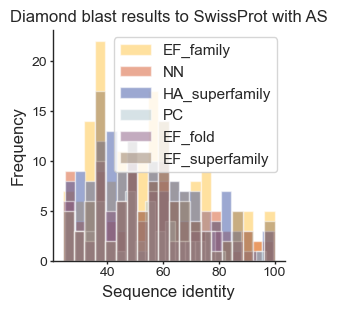

In [93]:
from Bio import AlignIO
import matplotlib.pyplot as plt
import numpy as np

# OK here we need to have all the swiss prot since we're searching fro both the test and the training to this set
# so this is just uniprot to the active sites
uniprot_id_to_active_site = dict(zip(swissprot['Entry'], swissprot['Residue']))

dataset_to_blast = {}
missing_blast_seq = pd.DataFrame()
total_missing, total_found = 0, 0

for di, df_label in enumerate(order):
    df_label = df_label + '_BLAST_latest.pkl'
    df = results[df_label]
    predicted_active_sites = {}
    missing, found = 0, 0
    missing_entries = []
    for query, uniprot in df[['From', 'target']].values:
        if not uniprot or not isinstance(uniprot, str):
            missing += 1
            missing_entries.append(query)
        else:
            fin = f'msa/{uniprot}_{query}.msa'
            # Read with bioseq
            # Read the alignment
            active_sites = [int(x) for x in uniprot_id_to_active_site.get(uniprot).split('|')]
            alignment = AlignIO.read(fin, 'fasta')
            # get the existing one and then calculate the position gapped
            records = {}
            for record in alignment:
                records[record.id] = record.seq
            # Now get the active site
            position_count = 0
            active_pred = []
            query_seq = records[query]
            query_count = 0
            x = 0
            for i, v in enumerate(records[uniprot]):
                if position_count in active_sites:
                    if query_count < len(query_seq.replace('-', '')):
                        active_pred.append(query_count)
                    if query_seq[i] != v:
                        x += 1
                        #print(query, uniprot, v, query_seq[i])
                if v != '-':
                    position_count += 1
                if query_seq[i] != '-' and query_seq[i] != ' ':
                    query_count += 1
        
            predicted_active_sites[query] = '|'.join([str(s) for s in active_pred])
            found += 1
            # Now we can just add on the
        # except:
        #     missing += 1
    
    df['BLAST_residues'] = [predicted_active_sites.get(label) for label in df['From'].values]
    df['True_residues'] = [uniprot_id_to_active_site.get(label) for label in df['From'].values]
    results[df_label] = df
    
    df.to_csv(f'data/AEGAN/blast/{df_label.replace(".pkl", ".csv")}')
    u.warn_p(['Missing a BLAST sequence: ', missing, 'Found with BLAST sequences:', found])
    # Check the agreement:
    precision, recall, f1, support, agree, disagree, no_pred, mean_agreement = calculate_stats(df, 'From', 'True_residues', 'BLAST_residues', 'Sequence')
    dataset_to_blast[df_label.replace("_BLAST_latest.pkl", "")] = {'recall': recall, 'f1': f1, 'precision': precision}
    
    # Keep track of the ones with missing BLAST and we'll check Squidly on these
    missing_df = df[df['From'].isin(missing_entries)]
    missing_df['Label'] = df_label.replace("_BLAST_latest.pkl", "")
    missing_blast_seq = pd.concat([missing_df, missing_blast_seq])
    
    u.dp([df_label.replace("_BLAST_latest.pkl", ""), '\nF1', f1, '\nprecision:', precision, '\n recall:', recall])
    # Add the seq identity plot
    plt.hist(df['sequence identity'].values, bins=20, label=df_label.replace("_BLAST_latest.pkl", ""), color=colors[di], alpha=0.5)
    total_missing += missing
    total_found += found

plt.title('Diamond blast results to SwissProt with AS')
plt.legend()
ax = clean_plt(plt.gca())
plt.ylabel('Frequency')
plt.xlabel('Sequence identity')
print(total_missing)
plt.savefig(f'figures/DiamondBlast_histogram_{f.replace(".csv", "")}.svg')

In [70]:
def ensemble_predictions(df, blast_col, squidly_col, seq_id_col, squidly_similarity_cutoff=30):
    # Basically we update the choice of blast and squidly based on the cutoff 
    chosen_residues = []
    for blast_res, squidly_res, seq_id in df[[blast_col, squidly_col, seq_id_col]].values:
        # Also check if both are here otherwise pick the other one that was predicted
        if not isinstance(blast_res, str):
            chosen_residues.append(squidly_res)
        elif not isinstance(squidly_res, str):
            chosen_residues.append(blast_res)
        elif seq_id < squidly_similarity_cutoff:
            chosen_residues.append(squidly_res)
        elif seq_id >= squidly_similarity_cutoff:
            chosen_residues.append(blast_res)
        else:
            chosen_residues.append(None)
    df['chosen_residues'] = chosen_residues
    return df


In [73]:

# rows = []
# entry_to_squidly_prediction = {}
# for squidly_cutoff in tqdm(range(0, 100, 2)):
#     for df_label in results:
#         if df_label == 'label':
#             continue
#         df = results[df_label]
#         squidly_df = pd.read_pickle(f'data/Squidly/{df_label.replace("_BLAST_latest.pkl", "")}_squidly_as_pred_3B.pkl')
#         squidly_df.set_index('label', inplace=True)
#         df = df.join(squidly_df, how='left')
#         for query, pred in df[['From', 'Squidly_CR_Position']].values:
#             entry_to_squidly_prediction[query] = pred
#         # 'From', 'True_residues', 'BLAST_residues', 'Sequence'
#         tmp_df = ensemble_predictions(df, 'BLAST_residues', 'Squidly_CR_Position', 'sequence identity', squidly_cutoff)
#         precision, recall, f1, support, agree, disagree, no_pred, mean_agreement = calculate_stats(tmp_df, 'From', 'True_residues', 'chosen_residues', 'Sequence')
#         rows.append([df_label.replace(".pkl", ""), squidly_cutoff, f1, precision, recall, support, agree, disagree, no_pred, mean_agreement])


In [74]:
# for df_label in results:
#     if df_label == 'label':
#         continue
#     df = results[df_label]
#     squidly_df = pd.read_pickle(f'data/Squidly/{df_label.replace("_BLAST_latest.pkl", "")}_squidly_as_pred_3B.pkl')
#     squidly_df.set_index('label', inplace=True)
#     df = df.join(squidly_df, how='left')
#     for query, pred in df[['From', 'Squidly_CR_Position']].values:
#         entry_to_squidly_prediction[query] = pred
#     # 'From', 'True_residues', 'BLAST_residues', 'Sequence'
#     tmp_df = ensemble_predictions(df, 'BLAST_residues', 'Squidly_CR_Position', 'sequence identity', squidly_cutoff)
#     precision, recall, f1, support, agree, disagree, no_pred, mean_agreement = calculate_stats(tmp_df, 'From', 'True_residues', 'chosen_residues', 'Sequence')
#     u.dp([df_label.replace("_BLAST.pkl", ""), '\nF1', f1, '\nprecision:', precision, '\n recall:', recall])


In [29]:
# squidly_ensemble['label'] = [s.split('|')[1] for s in squidly_ensemble.index.values]
# squidly_ensemble.set_index('label', inplace=True)
# squidly_ensemble

,Squidly_CR_Position,Squidly_CR_probabilities,Squidly_CR_representations,all_AS_probs,Squidly_CR_Position_2,Squidly_CR_probabilities_2,Squidly_CR_representations_2,all_AS_probs_2,Squidly_CR_Position_3,Squidly_CR_probabilities_3,...,Squidly_CR_probabilities_4,Squidly_CR_representations_4,all_AS_probs_4,Squidly_CR_Position_5,Squidly_CR_probabilities_5,Squidly_CR_representations_5,all_AS_probs_5,mean_prob,aleatoric,residues
label,,,,,,,,,,,,,,,,,,,,,
P41500,17|25|39|43,0.97945434|0.9949208|0.9438314|0.9970669,"[[-0.008071839, -0.0026321118, 0.030747466, -0...","[0.0017, 0.0012, 0.0012, 0.0012, 0.0012, 0.001...",25|43|49,0.99683064|0.9795395|0.9701357,"[[-0.01404857, -0.025980465, 0.005785331, -0.0...","[0.002, 0.0015, 0.0013, 0.0013, 0.0013, 0.0013...",25,0.9465867,...,0.99809045,"[[-0.04393964, 0.0053708646, -0.0006872659, -0...","[0.0009, 0.0008, 0.0017, 0.0008, 0.0008, 0.000...",25|43,0.99059767|0.99973375,"[[0.10975949, 0.09464461, -0.059588395, 0.1018...","[0.0011, 0.0009, 0.0008, 0.0008, 0.0008, 0.000...","[0.95128001, 0.9689800100000001]","[0.22626957899244418, 0.1461098016335396]",25|43
P00608,47|92,0.99975127|0.99963117,"[[-0.014803885, -0.042800855, 0.13033558, -0.3...","[0.0017, 0.0013, 0.0012, 0.0012, 0.0012, 0.001...",47|92,0.99988496|0.9993556,"[[-0.11534361, 0.102402985, 0.074797794, -0.01...","[0.002, 0.0015, 0.0013, 0.0013, 0.0012, 0.0013...",47|92,0.9995647|0.99959046,...,0.99992335|0.9999409,"[[0.28146058, -0.30047092, -0.084338054, -0.21...","[0.0007, 0.0016, 0.0013, 0.0009, 0.0019, 0.000...",47|92,0.9998964|0.99968636,"[[-0.9696908, -0.2595702, 0.035169255, -0.5254...","[0.0011, 0.0008, 0.0008, 0.0008, 0.0008, 0.000...","[0.99982001, 0.99964001]","[0.0008998349964982576, 0.0017995599559875578]",47|92
P0A790,24|57,0.9999491|0.99994683,"[[0.07157489, 0.12689008, 0.13928556, 0.104005...","[0.0017, 0.0012, 0.0012, 0.0012, 0.0012, 0.001...",24|57,0.99992514|0.99991214,"[[0.25912526, -0.12811132, -0.14591728, 0.5756...","[0.002, 0.0015, 0.0013, 0.0013, 0.0012, 0.0012...",24|57,0.99822205|0.9997725,...,0.9999341|0.99997926,"[[-0.14758115, -0.409113, -0.11161434, -0.0873...","[0.0008, 0.0008, 0.001, 0.0007, 0.0016, 0.001,...",24|57,0.999102|0.9999784,"[[-0.04570018, -0.36610574, 0.26567414, -0.166...","[0.0009, 0.0007, 0.0007, 0.0007, 0.0007, 0.000...","[0.9994000100000001, 0.99992001]","[0.0029979089350894482, 0.00039992000233316015]",24|57
P0A731,,,[],"[0.0017, 0.0012, 0.0012, 0.0012, 0.0012, 0.001...",,,[],"[0.002, 0.0015, 0.0013, 0.0013, 0.0013, 0.0013...",,,...,,[],"[0.0007, 0.0008, 0.0007, 0.0008, 0.0008, 0.000...",,,[],"[0.0012, 0.0009, 0.0008, 0.0008, 0.0008, 0.000...",[],[],
P22887,121,0.99953806,"[[0.1078849, 0.030965114, -0.117437005, 0.0739...","[0.0017, 0.0012, 0.0012, 0.0012, 0.0012, 0.001...",121|132,0.99985313|0.90698117,"[[-0.10396832, 0.19060132, 0.031913772, -0.186...","[0.002, 0.0015, 0.0013, 0.0013, 0.0013, 0.0013...",121,0.9985505,...,0.9999366,"[[-0.6018532, 0.4152493, -0.11593022, 0.066706...","[0.0009, 0.0008, 0.0009, 0.0008, 0.0007, 0.000...",121,0.9997893,"[[0.077035524, 0.6788002, 0.008320153, 0.12877...","[0.0011, 0.0009, 0.0008, 0.0008, 0.0008, 0.000...",[0.9995400100000001],[0.0022988145428516206],121
P0A6K3,90|133,0.9568856|0.9988808,"[[0.0004828173, 0.0002817274, -0.00095475116, ...","[0.0017, 0.0012, 0.0012, 0.0012, 0.0012, 0.001...",133,0.9962993,"[[-0.016497571, -0.05834429, 0.0066336384, 0.0...","[0.002, 0.0016, 0.0013, 0.0013, 0.0013, 0.0013...",90|133,0.9476882|0.9607349,...,0.999423,"[[-0.101033084, -0.22415653, -0.046695154, -0....","[0.0009, 0.0008, 0.0007, 0.0007, 0.0007, 0.000...",133,0.9337132,"[[0.036855754, 0.13570268, -0.03278986, 0.0161...","[0.0012, 0.0009, 0.0008, 0.0008, 0.0008, 0.000...",[0.9778000099999999],[0.10796165284082543],133
P26394,62|132,0.9981914|0.99807286,"[[0.06256913, -0.07532209, -0.021930318, 0.005...","[0.0017, 0.0012, 0.0012, 0.0012, 0.0012, 0.001...",62|132,0.99799997|0.9994293,"[[0.014445385, 0.012674043, -0.014341561, -0.0...","[0.0021, 0.0016

# Compute the ensemble 



In [121]:
from tqdm import tqdm 
import numpy as np

# Read in the predictions from the ensemble
def compute_uncertainties(df, prob_columns):
    means, aleatorics, epistemics, residues  = [], [], [], []
    for p1, p2, p3, p4, p5 in tqdm(df[prob_columns].values):
        mean_values = []
        aleatoric_values = []
        epistemic_values = []
        indicies = []
        for j in range(0, len(p1)):
        
            # Aleatoric: average predicted entropy
            eps = 1e-8  # for numerical stability
            # For each value we want the mean and the variance and the uncertainty
            all_probs = [p1[j] + eps, p2[j] + eps, p3[j] + eps, p4[j] + eps, p5[j] + eps]
            mean_probs = np.mean(all_probs) # (N, 10)
            var_probs = np.var(all_probs)    # epistemic uncertainty (variance across models)

            entropies = -np.sum(all_probs * np.log(all_probs))  # (num_models, N)
            aleatoric = np.mean(entropies)   # (N,)
        
            # Epistemic: entropy of mean prediction minus mean entropy
            mean_entropy = -np.sum(mean_probs * np.log(mean_probs + eps))  # (N,)
            epistemic = mean_entropy - aleatoric  # (N,)
            if mean_probs > 0.8:
                indicies.append(j)
                mean_values.append(mean_probs)
                aleatoric_values.append(aleatoric)
                epistemic_values.append(epistemics)
        means.append(mean_values)
        aleatorics.append(aleatoric_values) 
        epistemics.append(epistemic_values)
        residues.append('|'.join([str(s) for s in indicies]))
    return means, aleatorics, epistemics, residues


In [122]:
files = ['PC',
 'NN',
 'EF_superfamily',
 'EF_fold',
 'family_specific',
 'EF_family',
 'HA_superfamily'] 
squidly_3B_ensembles = {}
for f in files:
    squidly_ensemble = pd.DataFrame()
    for i in range(1, 6):
        squidly = pd.read_pickle(f'data/{f}_3B_{i}_squidly.pkl')
        squidly['label'] = [l if '|' not in l else l.split('|')[1] for l in squidly['label'].values]
        squidly.set_index('label', inplace=True)
        squidly['family'] = f
        squidly['method'] = '3B'
        squidly_ensemble = squidly_ensemble.join(squidly, how='outer', rsuffix=f'_{i}')
    cols = ['all_AS_probs', 'all_AS_probs_2', 'all_AS_probs_3', 'all_AS_probs_4', 'all_AS_probs_5']
    means, aleatorics, epistemics, residues = compute_uncertainties(squidly_ensemble, cols)
    squidly_ensemble['mean_prob'] = means
    squidly_ensemble['aleatoric'] = aleatorics
    squidly_ensemble['residues'] = residues
    squidly_3B_ensembles[f] = squidly_ensemble

100%|█| 55/55 [00:01<00:00, 38.07i
100%|█| 108/108 [00:02<00:00, 38.4
100%|█| 123/123 [00:03<00:00, 38.3
100%|█| 93/93 [00:02<00:00, 38.31i
0it [00:00, ?it/s]
100%|█| 196/196 [00:05<00:00, 38.1
100%|█| 152/152 [00:03<00:00, 38.1


In [123]:

squidly_15B_ensembles = {}
for f in files:
    squidly_ensemble = pd.DataFrame()
    try:
        for i in range(1, 6):
                squidly = pd.read_pickle(f'data/{f}_15B_{i}_squidly.pkl')
                squidly['label'] = [l if '|' not in l else l.split('|')[1] for l in squidly['label'].values]
                squidly.set_index('label', inplace=True)
                squidly['family'] = f
                squidly['method'] = '15B'
                squidly_ensemble = squidly_ensemble.join(squidly, how='outer', rsuffix=f'_{i}')

        cols = ['all_AS_probs', 'all_AS_probs_2', 'all_AS_probs_3', 'all_AS_probs_4', 'all_AS_probs_5']
        means, aleatorics, epistemics, residues = compute_uncertainties(squidly_ensemble, cols)
        squidly_ensemble['mean_prob'] = means
        squidly_ensemble['aleatoric'] = aleatorics
        squidly_ensemble['residues'] = residues
        squidly_15B_ensembles[f] = squidly_ensemble
    except:
        print(f'data/{f}_15B_{i}_squidly.pkl')

100%|█| 55/55 [00:01<00:00, 38.60i
100%|█| 108/108 [00:02<00:00, 38.5
100%|█| 123/123 [00:03<00:00, 38.5
100%|█| 93/93 [00:02<00:00, 38.31i
0it [00:00, ?it/s]
100%|█| 196/196 [00:05<00:00, 38.1
100%|█| 152/152 [00:03<00:00, 38.6


In [138]:
for df_label in results:
    entry_to_squidly_prediction = {}
    df = results[df_label]
    squidly_df = squidly_3B_ensembles[df_label.replace("_BLAST_latest.pkl", "")]
    df = df.join(squidly_df, how='left')
    for query, pred in df[['From', 'residues']].values:
        entry_to_squidly_prediction[query] = pred
    # 'From', 'True_residues', 'BLAST_residues', 'Sequence'
    tmp_df = ensemble_predictions(df, 'BLAST_residues', 'residues', 'sequence identity', 100)
    precision, recall, f1, support, agree, disagree, no_pred, mean_agreement = calculate_stats(tmp_df, 'From', 'True_residues', 'residues', 'Sequence')
    u.dp([df_label.replace("_BLAST.pkl", ""), '\nF1', f1, '\nprecision:', precision, '\n recall:', recall])
    # # No sequences 
    # tmp_df = missing_blast_seq[missing_blast_seq['Label'] == df_label]
    # tmp_df['Squidly_CR_Position'] = [entry_to_squidly_prediction[q] for q in tmp_df['From'].values]
    # precision, recall, f1, support, agree, disagree, no_pred, mean_agreement = calculate_stats(tmp_df, 'From', 'True_residues', 'Squidly_CR_Position', 'Sequence')
    # u.warn_p([df_label.replace("_BLAST.pkl", ""), '\nF1', f1, '\nprecision:', precision, '\n recall:', recall, 'Num seqs:', len(tmp_df)])


You were missing N reference sequences: 0
[0.99940026 0.85322896] 0.853228962818004
--------------------------------------------------------------------------------
HA_superfamily_BLAST_latest.pkl	
F1	0.853228962818004	
precision:	0.923728813559322	
 recall:	0.7927272727272727	
--------------------------------------------------------------------------------
You were missing N reference sequences: 0
[0.99949206 0.87947883] 0.8794788273615635
--------------------------------------------------------------------------------
EF_fold_BLAST_latest.pkl	
F1	0.8794788273615635	
precision:	0.9507042253521126	
 recall:	0.8181818181818182	
--------------------------------------------------------------------------------
You were missing N reference sequences: 0
[0.99952783 0.88762447] 0.8876244665718351
--------------------------------------------------------------------------------
EF_family_BLAST_latest.pkl	
F1	0.8876244665718351	
precision:	0.9341317365269461	
 recall:	0.8455284552845529	
-------

In [125]:
for df_label in results:
    entry_to_squidly_prediction = {}
    df = results[df_label]
    squidly_df = squidly_15B_ensembles[df_label.replace("_BLAST_latest.pkl", "")]
    df = df.join(squidly_df, how='left')
    for query, pred in df[['From', 'residues']].values:
        entry_to_squidly_prediction[query] = pred
    # 'From', 'True_residues', 'BLAST_residues', 'Sequence'
    tmp_df = ensemble_predictions(df, 'BLAST_residues', 'residues', 'sequence identity', 100)
    precision, recall, f1, support, agree, disagree, no_pred, mean_agreement = calculate_stats(tmp_df, 'From', 'True_residues', 'residues', 'Sequence')
    u.dp([df_label.replace("_BLAST.pkl", ""), '\nF1', f1, '\nprecision:', precision, '\n recall:', recall])
    # # No sequences 
    # tmp_df = missing_blast_seq[missing_blast_seq['Label'] == df_label]
    # tmp_df['Squidly_CR_Position'] = [entry_to_squidly_prediction[q] for q in tmp_df['From'].values]
    # precision, recall, f1, support, agree, disagree, no_pred, mean_agreement = calculate_stats(tmp_df, 'From', 'True_residues', 'Squidly_CR_Position', 'Sequence')
    # u.warn_p([df_label.replace("_BLAST.pkl", ""), '\nF1', f1, '\nprecision:', precision, '\n recall:', recall, 'Num seqs:', len(tmp_df)])


You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
--------------------------------------------------------------------------------
HA_superfamily_BLAST_latest.pkl	
F1	0.8538011695906433	
precision:	0.9201680672268907	
 recall:	0.7963636363636364	
--------------------------------------------------------------------------------
You were missing N reference sequences: 0
[0.99951953 0.8852459 ] 0.8852459016393442
--------------------------------------------------------------------------------
EF_fold_BLAST_latest.pkl	
F1	0.8852459016393442	
precision:	0.9642857142857143	
 recall:	0.8181818181818182	
--------------------------------------------------------------------------------
You were missing N reference sequences: 0
[0.99953983 0.88759124] 0.8875912408759125
--------------------------------------------------------------------------------
EF_family_BLAST_latest.pkl	
F1	0.8875912408759125	
precision:	0.9620253164556962	
 recall:	0.8238482384823849	
----

# Also look at ensembling with BLAST

In [130]:
rows = []
for squidly_cutoff in tqdm(range(0, 100, 2)):
    for df_label in results:
        if df_label == 'label':
            continue
        df = results[df_label]
        squidly_df = squidly_3B_ensembles[df_label.replace("_BLAST_latest.pkl", "")]
        df = df.join(squidly_df, how='left')
        # 'From', 'True_residues', 'BLAST_residues', 'Sequence'
        tmp_df = ensemble_predictions(df, 'BLAST_residues', 'residues', 'sequence identity', squidly_cutoff)
        precision, recall, f1, support, agree, disagree, no_pred, mean_agreement = calculate_stats(tmp_df, 'From', 'True_residues', 'chosen_residues', 'Sequence')
        rows.append([df_label.replace(".pkl", ""), squidly_cutoff, f1, precision, recall, support, agree, disagree, no_pred, mean_agreement])


  2%| | 1/50 [00:00<00:10,  4.56it

You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0


  4%| | 2/50 [00:00<00:09,  4.96it

[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0


  6%| | 3/50 [00:00<00:09,  5.09it

[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0


  8%| | 4/50 [00:00<00:08,  5.17it

[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0


 10%| | 5/50 [00:00<00:08,  5.21it

[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0


 14%|▏| 7/50 [00:01<00:08,  5.26it

[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0


 16%|▏| 8/50 [00:01<00:07,  5.26it

[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0


 18%|▏| 9/50 [00:01<00:07,  5.27it

[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0


 20%|▏| 10/50 [00:01<00:07,  5.26i

[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0


 22%|▏| 11/50 [00:02<00:07,  5.28i

[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0


 26%|▎| 13/50 [00:02<00:06,  5.29i

[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0
[0.99945615 0.87218045] 0.8721804511278195
You were missing N reference sequences: 0
[0.99964299 0.91925466] 0.9192546583850931
You were missing N reference sequences: 0
[0.99950389 0.88391608] 0.8839160839160838
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99962145 0.91627907] 0.9162790697674419
You were missing N reference sequences: 0
[0.99950226 0.88      ] 0.88
You were missing N reference sequences: 0


 28%|▎| 14/50 [00:02<00:06,  5.25i

[0.99947215 0.8754717 ] 0.8754716981132075
You were missing N reference sequences: 0
[0.999643 0.91875 ] 0.9187499999999998
You were missing N reference sequences: 0
[0.99950987 0.88515406] 0.8851540616246498
You were missing N reference sequences: 0
[0.99955067 0.90052356] 0.9005235602094241
You were missing N reference sequences: 0
[0.99962146 0.91588785] 0.9158878504672897
You were missing N reference sequences: 0
[0.99953545 0.88770053] 0.8877005347593583
You were missing N reference sequences: 0
[0.99945617 0.87072243] 0.870722433460076
You were missing N reference sequences: 0


 30%|▎| 15/50 [00:02<00:06,  5.26i

[0.99960183 0.90851735] 0.9085173501577286
You were missing N reference sequences: 0
[0.99950987 0.88515406] 0.8851540616246498
You were missing N reference sequences: 0
[0.99947976 0.88297872] 0.8829787234042553
You were missing N reference sequences: 0
[0.99958993 0.90823529] 0.908235294117647
You were missing N reference sequences: 0
[0.99950228 0.8787062 ] 0.8787061994609164
You were missing N reference sequences: 0
[0.99944819 0.86806883] 0.8680688336520076
You were missing N reference sequences: 0
[0.9995881  0.90506329] 0.9050632911392406
You were missing N reference sequences: 0


 32%|▎| 16/50 [00:03<00:06,  5.27i

[0.99951585 0.88639551] 0.8863955119214586
You were missing N reference sequences: 0
[0.99950342 0.88770053] 0.8877005347593583
You were missing N reference sequences: 0
[0.99958993 0.90823529] 0.908235294117647
You were missing N reference sequences: 0
[0.99951335 0.88108108] 0.8810810810810811
You were missing N reference sequences: 0
[0.99946418 0.87189293] 0.8718929254302102
You were missing N reference sequences: 0
[0.9995881  0.90506329] 0.9050632911392406
You were missing N reference sequences: 0
[0.99953378 0.89044944] 0.8904494382022472
You were missing N reference sequences: 0
[0.99950342 0.88770053] 0.8877005347593583
You were missing N reference sequences: 0


 34%|▎| 17/50 [00:03<00:06,  5.28i

[0.9996425  0.91981132] 0.9198113207547169
You were missing N reference sequences: 0
[0.99951335 0.88108108] 0.8810810810810811
You were missing N reference sequences: 0
[0.99948018 0.87571702] 0.875717017208413
You were missing N reference sequences: 0
[0.9995881  0.90506329] 0.9050632911392406
You were missing N reference sequences: 0
[0.99953977 0.89139633] 0.8913963328631876
You were missing N reference sequences: 0
[0.99955073 0.8972973 ] 0.8972972972972972
You were missing N reference sequences: 0
[0.99964251 0.91943128] 0.919431279620853
You were missing N reference sequences: 0


 38%|▍| 19/50 [00:03<00:05,  5.29i

[0.99953548 0.88586957] 0.8858695652173914
You were missing N reference sequences: 0
[0.9994562  0.86923077] 0.8692307692307693
You were missing N reference sequences: 0
[0.99956066 0.89808917] 0.8980891719745222
You were missing N reference sequences: 0
[0.99956368 0.89674682] 0.8967468175388967
You were missing N reference sequences: 0
[0.99950346 0.8852459 ] 0.8852459016393442
You were missing N reference sequences: 0
[0.99961098 0.91169451] 0.9116945107398569
You were missing N reference sequences: 0
[0.99951337 0.87978142] 0.8797814207650274
You were missing N reference sequences: 0


 40%|▍| 20/50 [00:03<00:05,  5.28i

[0.99943221 0.86319846] 0.8631984585741811
You were missing N reference sequences: 0
[0.99953321 0.89102564] 0.8910256410256411
You were missing N reference sequences: 0
[0.99955173 0.89361702] 0.8936170212765958
You were missing N reference sequences: 0
[0.99950346 0.8852459 ] 0.8852459016393442
You were missing N reference sequences: 0
[0.99958996 0.90647482] 0.906474820143885
You were missing N reference sequences: 0
[0.99950233 0.87603306] 0.8760330578512397
You were missing N reference sequences: 0
[0.99944021 0.86486486] 0.8648648648648649
You were missing N reference sequences: 0


 42%|▍| 21/50 [00:04<00:05,  5.24i

[0.99954693 0.89456869] 0.8945686900958466
You were missing N reference sequences: 0
[0.99958162 0.90056818] 0.9005681818181819
You were missing N reference sequences: 0
[0.99950346 0.8852459 ] 0.8852459016393442
You were missing N reference sequences: 0
[0.99960048 0.90865385] 0.9086538461538461
You were missing N reference sequences: 0
[0.99951338 0.87912088] 0.879120879120879
You were missing N reference sequences: 0
[0.99945621 0.86872587] 0.8687258687258688
You were missing N reference sequences: 0
[0.99958812 0.9044586 ] 0.9044585987261147
You were missing N reference sequences: 0


 44%|▍| 22/50 [00:04<00:05,  5.25i

[0.99958759 0.90212766] 0.902127659574468
You were missing N reference sequences: 0
[0.99955075 0.89617486] 0.8961748633879781
You were missing N reference sequences: 0
[0.99963202 0.91606715] 0.9160671462829736
You were missing N reference sequences: 0
[0.99954656 0.88767123] 0.8876712328767123
You were missing N reference sequences: 0
[0.99945621 0.86872587] 0.8687258687258688
You were missing N reference sequences: 0
[0.99957439 0.90095847] 0.9009584664536742
You were missing N reference sequences: 0
[0.99958162 0.90056818] 0.9005681818181819
You were missing N reference sequences: 0
[0.99955075 0.89617486] 0.8961748633879781
You were missing N reference sequences: 0


 46%|▍| 23/50 [00:04<00:05,  5.27i

[0.99963202 0.91606715] 0.9160671462829736
You were missing N reference sequences: 0
[0.99954656 0.88767123] 0.8876712328767123
You were missing N reference sequences: 0
[0.9994802  0.87475915] 0.8747591522157996
You were missing N reference sequences: 0
[0.99957439 0.90095847] 0.9009584664536742
You were missing N reference sequences: 0
[0.9995637  0.89586305] 0.8958630527817404
You were missing N reference sequences: 0
[0.99957439 0.90217391] 0.9021739130434783
You were missing N reference sequences: 0
[0.99963202 0.91606715] 0.9160671462829736
You were missing N reference sequences: 0


 50%|▌| 25/50 [00:04<00:04,  5.29i

[0.99955761 0.89071038] 0.8907103825136613
You were missing N reference sequences: 0
[0.99948819 0.87692308] 0.8769230769230769
You were missing N reference sequences: 0
[0.99960184 0.90793651] 0.907936507936508
You were missing N reference sequences: 0
[0.99957565 0.89900427] 0.8990042674253201
You were missing N reference sequences: 0
[0.99959802 0.90810811] 0.908108108108108
You were missing N reference sequences: 0
[0.99965304 0.92124105] 0.9212410501193317
You were missing N reference sequences: 0
[0.99956867 0.89373297] 0.893732970027248
You were missing N reference sequences: 0


 52%|▌| 26/50 [00:04<00:04,  5.30i

[0.99949619 0.87861272] 0.8786127167630058
You were missing N reference sequences: 0
[0.99961557 0.91082803] 0.910828025477707
You were missing N reference sequences: 0
[0.99959955 0.90496454] 0.9049645390070923
You were missing N reference sequences: 0
[0.99962168 0.91304348] 0.9130434782608696
You were missing N reference sequences: 0
[0.99965304 0.92124105] 0.9212410501193317
You were missing N reference sequences: 0
[0.99957973 0.89617486] 0.8961748633879781
You were missing N reference sequences: 0
[0.99949619 0.87861272] 0.8786127167630058
You were missing N reference sequences: 0


 54%|▌| 27/50 [00:05<00:04,  5.30i

[0.99961557 0.91082803] 0.910828025477707
You were missing N reference sequences: 0
[0.99959955 0.90496454] 0.9049645390070923
You were missing N reference sequences: 0
[0.99962168 0.91304348] 0.9130434782608696
You were missing N reference sequences: 0
[0.99965304 0.92124105] 0.9212410501193317
You were missing N reference sequences: 0
[0.99957973 0.89617486] 0.8961748633879781
You were missing N reference sequences: 0
[0.99949619 0.87861272] 0.8786127167630058
You were missing N reference sequences: 0
[0.99961557 0.91082803] 0.910828025477707
You were missing N reference sequences: 0


 56%|▌| 28/50 [00:05<00:04,  5.30i

[0.99959955 0.90496454] 0.9049645390070923
You were missing N reference sequences: 0
[0.99962168 0.91304348] 0.9130434782608696
You were missing N reference sequences: 0
[0.99965304 0.92124105] 0.9212410501193317
You were missing N reference sequences: 0
[0.99957973 0.89617486] 0.8961748633879781
You were missing N reference sequences: 0
[0.9994802  0.87427466] 0.874274661508704
You were missing N reference sequences: 0
[0.9995744  0.90032154] 0.9003215434083601
You were missing N reference sequences: 0
[0.99957565 0.89900427] 0.8990042674253201
You were missing N reference sequences: 0


 58%|▌| 29/50 [00:05<00:03,  5.29i

[0.99962168 0.91304348] 0.9130434782608696
You were missing N reference sequences: 0
[0.99963202 0.91606715] 0.9160671462829736
You were missing N reference sequences: 0
[0.99955762 0.89010989] 0.8901098901098902
You were missing N reference sequences: 0
[0.99946422 0.86990291] 0.8699029126213592
You were missing N reference sequences: 0
[0.9995744  0.90032154] 0.9003215434083601
You were missing N reference sequences: 0
[0.9995637  0.89586305] 0.8958630527817404
You were missing N reference sequences: 0
[0.99962168 0.91304348] 0.9130434782608696
You were missing N reference sequences: 0


 60%|▌| 30/50 [00:05<00:03,  5.30i

[0.99962151 0.91346154] 0.9134615384615384
You were missing N reference sequences: 0
[0.99955762 0.89010989] 0.8901098901098902
You were missing N reference sequences: 0
[0.99943225 0.86105675] 0.8610567514677104
You were missing N reference sequences: 0
[0.99953324 0.88961039] 0.8896103896103895
You were missing N reference sequences: 0
[0.99954578 0.89111748] 0.8911174785100288
You were missing N reference sequences: 0
[0.99952714 0.88888889] 0.888888888888889
You were missing N reference sequences: 0
[0.99957947 0.90291262] 0.9029126213592233
You were missing N reference sequences: 0


 64%|▋| 32/50 [00:06<00:03,  5.32i

[0.9995134  0.87777778] 0.8777777777777778
You were missing N reference sequences: 0
[0.99942425 0.859375  ] 0.859375
You were missing N reference sequences: 0
[0.99953324 0.88961039] 0.8896103896103895
You were missing N reference sequences: 0
[0.99954578 0.89111748] 0.8911174785100288
You were missing N reference sequences: 0
[0.99952714 0.88888889] 0.888888888888889
You were missing N reference sequences: 0
[0.99957947 0.90291262] 0.9029126213592233
You were missing N reference sequences: 0
[0.9995134  0.87777778] 0.8777777777777778
You were missing N reference sequences: 0


 66%|▋| 33/50 [00:06<00:03,  5.32i

[0.99942425 0.859375  ] 0.859375
You were missing N reference sequences: 0
[0.99953324 0.88961039] 0.8896103896103895
You were missing N reference sequences: 0
[0.99954578 0.89111748] 0.8911174785100288
You were missing N reference sequences: 0
[0.99950349 0.8839779 ] 0.8839779005524863
You were missing N reference sequences: 0
[0.99957947 0.90291262] 0.9029126213592233
You were missing N reference sequences: 0
[0.99950234 0.87534626] 0.8753462603878117
You were missing N reference sequences: 0
[0.99941626 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0


 68%|▋| 34/50 [00:06<00:03,  5.31i

[0.99953324 0.88961039] 0.8896103896103895
You were missing N reference sequences: 0
[0.99956968 0.89714286] 0.8971428571428571
You were missing N reference sequences: 0
[0.99950349 0.8839779 ] 0.8839779005524863
You were missing N reference sequences: 0
[0.99960049 0.90821256] 0.9082125603864735
You were missing N reference sequences: 0
[0.99949129 0.87222222] 0.8722222222222222
You were missing N reference sequences: 0
[0.99941626 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0
[0.99953324 0.88961039] 0.8896103896103895
You were missing N reference sequences: 0


 70%|▋| 35/50 [00:06<00:02,  5.31i

[0.99956968 0.89714286] 0.8971428571428571
You were missing N reference sequences: 0
[0.99950349 0.8839779 ] 0.8839779005524863
You were missing N reference sequences: 0
[0.99958997 0.9060241 ] 0.9060240963855422
You were missing N reference sequences: 0
[0.99949129 0.87222222] 0.8722222222222222
You were missing N reference sequences: 0
[0.99941626 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0
[0.99953324 0.88961039] 0.8896103896103895
You were missing N reference sequences: 0
[0.99956968 0.89714286] 0.8971428571428571
You were missing N reference sequences: 0
[0.99950349 0.8839779 ] 0.8839779005524863


 72%|▋| 36/50 [00:06<00:02,  5.29i

You were missing N reference sequences: 0
[0.99958997 0.9060241 ] 0.9060240963855422
You were missing N reference sequences: 0
[0.99949129 0.87222222] 0.8722222222222222
You were missing N reference sequences: 0
[0.99941625 0.85769981] 0.8576998050682261
You were missing N reference sequences: 0
[0.99953324 0.88961039] 0.8896103896103895
You were missing N reference sequences: 0
[0.99956968 0.89714286] 0.8971428571428571
You were missing N reference sequences: 0
[0.99950349 0.8839779 ] 0.8839779005524863
You were missing N reference sequences: 0


 74%|▋| 37/50 [00:07<00:02,  5.30i

[0.99958997 0.9060241 ] 0.9060240963855422
You were missing N reference sequences: 0
[0.99949129 0.87222222] 0.8722222222222222
You were missing N reference sequences: 0
[0.99940826 0.85546875] 0.8554687500000001
You were missing N reference sequences: 0
[0.99953324 0.88961039] 0.8896103896103895
You were missing N reference sequences: 0
[0.99956968 0.89714286] 0.8971428571428571
You were missing N reference sequences: 0
[0.99950349 0.8839779 ] 0.8839779005524863
You were missing N reference sequences: 0
[0.99958997 0.9060241 ] 0.9060240963855422
You were missing N reference sequences: 0


 78%|▊| 39/50 [00:07<00:02,  5.30i

[0.99949129 0.87222222] 0.8722222222222222
You were missing N reference sequences: 0
[0.99940826 0.85546875] 0.8554687500000001
You were missing N reference sequences: 0
[0.99953324 0.88961039] 0.8896103896103895
You were missing N reference sequences: 0
[0.9995637  0.89586305] 0.8958630527817404
You were missing N reference sequences: 0
[0.99950349 0.8839779 ] 0.8839779005524863
You were missing N reference sequences: 0
[0.99958997 0.9060241 ] 0.9060240963855422
You were missing N reference sequences: 0
[0.99949129 0.87222222] 0.8722222222222222
You were missing N reference sequences: 0


 80%|▊| 40/50 [00:07<00:01,  5.29i

[0.99940826 0.85546875] 0.8554687500000001
You were missing N reference sequences: 0
[0.9995195  0.88673139] 0.8867313915857605
You were missing N reference sequences: 0
[0.99953978 0.89078014] 0.8907801418439716
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791
You were missing N reference sequences: 0
[0.99957945 0.90384615] 0.9038461538461539
You were missing N reference sequences: 0
[0.99948022 0.86980609] 0.8698060941828254
You were missing N reference sequences: 0
[0.99940826 0.85546875] 0.8554687500000001
You were missing N reference sequences: 0


 82%|▊| 41/50 [00:07<00:01,  5.30i

[0.99950578 0.88311688] 0.8831168831168831
You were missing N reference sequences: 0
[0.99953381 0.88920455] 0.8892045454545453
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791
You were missing N reference sequences: 0
[0.99956894 0.90120482] 0.9012048192771084
You were missing N reference sequences: 0
[0.99948022 0.86980609] 0.8698060941828254
You were missing N reference sequences: 0
[0.99940826 0.85546875] 0.8554687500000001
You were missing N reference sequences: 0
[0.99950578 0.88311688] 0.8831168831168831
You were missing N reference sequences: 0


 84%|▊| 42/50 [00:07<00:01,  5.31i

[0.99953381 0.88920455] 0.8892045454545453
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791
You were missing N reference sequences: 0
[0.99956894 0.90120482] 0.9012048192771084
You were missing N reference sequences: 0
[0.99948022 0.86980609] 0.8698060941828254
You were missing N reference sequences: 0
[0.99940026 0.85322896] 0.853228962818004
You were missing N reference sequences: 0
[0.99950578 0.88311688] 0.8831168831168831
You were missing N reference sequences: 0
[0.99953381 0.88920455] 0.8892045454545453
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791


 86%|▊| 43/50 [00:08<00:01,  5.31i

You were missing N reference sequences: 0
[0.99956894 0.90120482] 0.9012048192771084
You were missing N reference sequences: 0
[0.99948022 0.86980609] 0.8698060941828254
You were missing N reference sequences: 0
[0.99940026 0.85322896] 0.853228962818004
You were missing N reference sequences: 0
[0.99950578 0.88311688] 0.8831168831168831
You were missing N reference sequences: 0
[0.99953381 0.88920455] 0.8892045454545453
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791
You were missing N reference sequences: 0


 88%|▉| 44/50 [00:08<00:01,  5.29i

[0.99956894 0.90120482] 0.9012048192771084
You were missing N reference sequences: 0
[0.99948022 0.86980609] 0.8698060941828254
You were missing N reference sequences: 0
[0.99940026 0.85322896] 0.853228962818004
You were missing N reference sequences: 0
[0.99950578 0.88311688] 0.8831168831168831
You were missing N reference sequences: 0
[0.99953381 0.88920455] 0.8892045454545453
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791
You were missing N reference sequences: 0
[0.99956894 0.90120482] 0.9012048192771084
You were missing N reference sequences: 0


 92%|▉| 46/50 [00:08<00:00,  5.29i

[0.99948022 0.86980609] 0.8698060941828254
You were missing N reference sequences: 0
[0.99940026 0.85322896] 0.853228962818004
You were missing N reference sequences: 0
[0.99950578 0.88311688] 0.8831168831168831
You were missing N reference sequences: 0
[0.99953381 0.88920455] 0.8892045454545453
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791
You were missing N reference sequences: 0
[0.99956894 0.90120482] 0.9012048192771084
You were missing N reference sequences: 0
[0.99948022 0.86980609] 0.8698060941828254
You were missing N reference sequences: 0


 94%|▉| 47/50 [00:08<00:00,  5.28i

[0.99940026 0.85322896] 0.853228962818004
You were missing N reference sequences: 0
[0.99950578 0.88311688] 0.8831168831168831
You were missing N reference sequences: 0
[0.99953381 0.88920455] 0.8892045454545453
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791
You were missing N reference sequences: 0
[0.99956894 0.90120482] 0.9012048192771084
You were missing N reference sequences: 0
[0.99948022 0.86980609] 0.8698060941828254
You were missing N reference sequences: 0
[0.99940026 0.85322896] 0.853228962818004
You were missing N reference sequences: 0


 96%|▉| 48/50 [00:09<00:00,  5.28i

[0.99950578 0.88311688] 0.8831168831168831
You were missing N reference sequences: 0
[0.99953381 0.88920455] 0.8892045454545453
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791
You were missing N reference sequences: 0
[0.99956894 0.90120482] 0.9012048192771084
You were missing N reference sequences: 0
[0.99948022 0.86980609] 0.8698060941828254
You were missing N reference sequences: 0
[0.99940026 0.85322896] 0.853228962818004
You were missing N reference sequences: 0
[0.99950578 0.88311688] 0.8831168831168831
You were missing N reference sequences: 0


 98%|▉| 49/50 [00:09<00:00,  5.30i

[0.99953381 0.88920455] 0.8892045454545453
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791
You were missing N reference sequences: 0
[0.99956894 0.90120482] 0.9012048192771084
You were missing N reference sequences: 0
[0.99948022 0.86980609] 0.8698060941828254
You were missing N reference sequences: 0
[0.99940026 0.85322896] 0.853228962818004
You were missing N reference sequences: 0
[0.99950578 0.88311688] 0.8831168831168831
You were missing N reference sequences: 0
[0.99953381 0.88920455] 0.8892045454545453
You were missing N reference sequences: 0
[0.99947983 0.87912088] 0.8791208791208791


100%|█| 50/50 [00:09<00:00,  5.27i

You were missing N reference sequences: 0
[0.99956894 0.90120482] 0.9012048192771084
You were missing N reference sequences: 0
[0.99948022 0.86980609] 0.8698060941828254


In [140]:
df = pd.DataFrame(rows, columns=['Dataset', '% cutoff', 'F1', 'Precision', 'Recall', 'Support', '% fully correct', ' % with difference', ' % missing', 'Mean correct'])
df['Dataset'] = [d.replace('_BLAST_latest', '') for d in df['Dataset'].values]
df.to_csv('data/Ensemble_Squidly_AEGAN_3B.csv', index=False)

In [151]:
def make_figure(df, x, y, hue, filename):
    ax = sns.lineplot(df, x=x, y=y, hue=hue, hue_order=order, palette=colors, legend=None)
    ax.axvline(50, c='black', linestyle = 'dashed')
    ax = sns.scatterplot(df, x=x, y=y, hue=hue, 
                         hue_order=order, ax=ax,
                         palette=colors, s=10, legend=None)
    for i, ds in enumerate(order):
        ax.axhline(dataset_to_blast.get(ds).get(y.lower()), c=colors[i], linestyle='dashed')
    ax = clean_plt(ax)
    plt.title(f'{filename.replace(".svg", "")}')
    plt.ylim(0.45, 1.0)
    plt.xlim(15, 75)
    plt.savefig(f'figures/{filename}')
    plt.show()
    

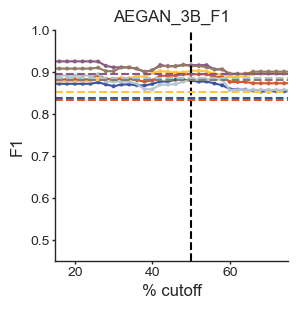

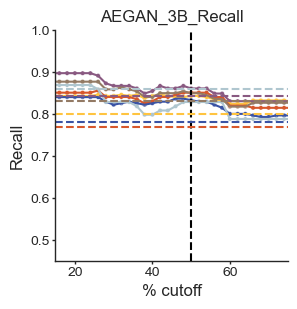

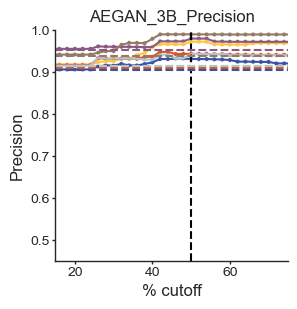

In [152]:
make_figure(df, x='% cutoff', y='F1', hue='Dataset', filename='AEGAN_3B_F1.svg')
make_figure(df, x='% cutoff', y='Recall', hue='Dataset', filename='AEGAN_3B_Recall.svg')
make_figure(df, x='% cutoff', y='Precision', hue='Dataset', filename='AEGAN_3B_Precision.svg')

In [145]:
df[df['% cutoff'] == 50]

,Dataset,% cutoff,F1,Precision,Recall,Support,% fully correct,% with difference,% missing,Mean correct
150,HA_superfamily,50,0.878613,0.934426,0.829091,275,0.763158,0.125000,0.111842,0.818531
151,EF_fold,50,0.910828,0.959732,0.866667,165,0.763441,0.129032,0.107527,0.827957
152,EF_family,50,0.904965,0.949405,0.864499,369,0.790816,0.142857,0.066327,0.861820
153,PC,50,0.913043,0.988235,0.848485,99,0.854545,0.036364,0.109091,0.872727
154,EF_superfamily,50,0.921241,0.965000,0.881279,219,0.813008,0.130081,0.056911,0.871951
155,NN,50,0.896175,0.953488,0.845361,194,0.805556,0.101852,0.092593,0.856481


In [146]:
df[df['% cutoff'] == 90]

,Dataset,% cutoff,F1,Precision,Recall,Support,% fully correct,% with difference,% missing,Mean correct
270,HA_superfamily,90,0.853229,0.923729,0.792727,275,0.717105,0.138158,0.144737,0.784539
271,EF_fold,90,0.883117,0.951049,0.824242,165,0.731183,0.118280,0.150538,0.792115
272,EF_family,90,0.889205,0.934328,0.848238,369,0.760204,0.137755,0.102041,0.831633
273,PC,90,0.879121,0.963855,0.808081,99,0.800000,0.072727,0.127273,0.839394
274,EF_superfamily,90,0.901205,0.954082,0.853881,219,0.788618,0.121951,0.089431,0.847561
275,NN,90,0.869806,0.940120,0.809278,194,0.759259,0.120370,0.120370,0.820988


In [147]:
rows = []
for squidly_cutoff in tqdm(range(0, 100, 2)):
    for df_label in results:
        if df_label == 'label':
            continue
        df = results[df_label]
        squidly_df = squidly_15B_ensembles[df_label.replace("_BLAST_latest.pkl", "")]
        df = df.join(squidly_df, how='left')
        # 'From', 'True_residues', 'BLAST_residues', 'Sequence'
        tmp_df = ensemble_predictions(df, 'BLAST_residues', 'residues', 'sequence identity', squidly_cutoff)
        precision, recall, f1, support, agree, disagree, no_pred, mean_agreement = calculate_stats(tmp_df, 'From', 'True_residues', 'chosen_residues', 'Sequence')
        rows.append([df_label.replace(".pkl", ""), squidly_cutoff, f1, precision, recall, support, agree, disagree, no_pred, mean_agreement])


  2%| | 1/50 [00:00<00:10,  4.51it

You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0


  4%| | 2/50 [00:00<00:09,  4.92it

[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0


  6%| | 3/50 [00:00<00:09,  5.08it

[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0


  8%| | 4/50 [00:00<00:08,  5.16it

[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0


 10%| | 5/50 [00:00<00:08,  5.20it

[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0


 14%|▏| 7/50 [00:01<00:08,  5.25it

[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0


 16%|▏| 8/50 [00:01<00:07,  5.26it

[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0


 18%|▏| 9/50 [00:01<00:07,  5.27it

[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0


 20%|▏| 10/50 [00:01<00:07,  5.27i

[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595


 22%|▏| 11/50 [00:02<00:07,  5.26i

You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0


 24%|▏| 12/50 [00:02<00:07,  5.27i

[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0
[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99945616 0.87169811] 0.8716981132075472
You were missing N reference sequences: 0
[0.99967047 0.925     ] 0.9249999999999999
You were missing N reference sequences: 0
[0.99948598 0.87853107] 0.8785310734463276
You were missing N reference sequences: 0
[0.99950335 0.89119171] 0.8911917098445595
You were missing N reference sequences: 0
[0.99958994 0.90780142] 0.9078014184397163
You were missing N reference sequences: 0


 28%|▎| 14/50 [00:02<00:06,  5.30i

[0.99951333 0.88235294] 0.8823529411764705
You were missing N reference sequences: 0
[0.99947216 0.875     ] 0.8749999999999999
You were missing N reference sequences: 0
[0.99967047 0.9245283 ] 0.9245283018867925
You were missing N reference sequences: 0
[0.99950391 0.88260255] 0.8826025459688828
You were missing N reference sequences: 0
[0.99952703 0.89473684] 0.8947368421052632
You were missing N reference sequences: 0
[0.99960045 0.90995261] 0.909952606635071
You were missing N reference sequences: 0
[0.99955758 0.89247312] 0.8924731182795699
You were missing N reference sequences: 0


 30%|▎| 15/50 [00:02<00:06,  5.30i

[0.99945618 0.87022901] 0.8702290076335878
You were missing N reference sequences: 0
[0.9996293  0.91428571] 0.9142857142857144
You were missing N reference sequences: 0
[0.99950392 0.8822695 ] 0.8822695035460992
You were missing N reference sequences: 0
[0.99945612 0.87700535] 0.8770053475935828
You were missing N reference sequences: 0
[0.99956893 0.90167866] 0.9016786570743405
You were missing N reference sequences: 0
[0.99952442 0.88346883] 0.8834688346883469
You were missing N reference sequences: 0
[0.9994402  0.86590038] 0.8659003831417624
You were missing N reference sequences: 0


 32%|▎| 16/50 [00:03<00:06,  5.29i

[0.99961557 0.91082803] 0.910828025477707
You were missing N reference sequences: 0
[0.99950392 0.8822695 ] 0.8822695035460992
You were missing N reference sequences: 0
[0.99945612 0.87700535] 0.8770053475935828
You were missing N reference sequences: 0
[0.99956893 0.90167866] 0.9016786570743405
You were missing N reference sequences: 0
[0.99952442 0.88346883] 0.8834688346883469
You were missing N reference sequences: 0
[0.99945619 0.8697318 ] 0.8697318007662835
You were missing N reference sequences: 0
[0.99961557 0.91082803] 0.910828025477707
You were missing N reference sequences: 0


 34%|▎| 17/50 [00:03<00:06,  5.27i

[0.99952185 0.88636364] 0.8863636363636364
You were missing N reference sequences: 0
[0.99945612 0.87700535] 0.8770053475935828
You were missing N reference sequences: 0
[0.999611   0.91084337] 0.9108433734939759
You were missing N reference sequences: 0
[0.99952442 0.88346883] 0.8834688346883469
You were missing N reference sequences: 0
[0.99945618 0.87022901] 0.8702290076335878
You were missing N reference sequences: 0
[0.99961557 0.91082803] 0.910828025477707
You were missing N reference sequences: 0
[0.99951588 0.88477952] 0.8847795163584636
You were missing N reference sequences: 0
[0.99945612 0.87700535] 0.8770053475935828
You were missing N reference sequences: 0


 36%|▎| 18/50 [00:03<00:06,  5.27i

[0.99961101 0.91041162] 0.9104116222760291
You were missing N reference sequences: 0
[0.99952442 0.88346883] 0.8834688346883469
You were missing N reference sequences: 0
[0.99944819 0.86806883] 0.8680688336520076
You were missing N reference sequences: 0
[0.99960185 0.90734824] 0.9073482428115015
You were missing N reference sequences: 0
[0.99953979 0.89015692] 0.8901569186875893
You were missing N reference sequences: 0
[0.99943249 0.87096774] 0.8709677419354839
You were missing N reference sequences: 0
[0.9996005  0.90776699] 0.9077669902912622
You were missing N reference sequences: 0


 40%|▍| 20/50 [00:03<00:05,  5.29i

[0.99951336 0.88043478] 0.8804347826086957
You were missing N reference sequences: 0
[0.9994482  0.86756238] 0.8675623800383877
You were missing N reference sequences: 0
[0.9995744  0.90032154] 0.9003215434083601
You were missing N reference sequences: 0
[0.99953383 0.88793103] 0.8879310344827587
You were missing N reference sequences: 0
[0.99938523 0.85869565] 0.8586956521739131
You were missing N reference sequences: 0
[0.99956897 0.8997555 ] 0.8997555012224938
You were missing N reference sequences: 0
[0.99950232 0.87671233] 0.8767123287671232
You were missing N reference sequences: 0


 42%|▍| 21/50 [00:04<00:05,  5.29i

[0.99946419 0.87140115] 0.8714011516314779
You were missing N reference sequences: 0
[0.99958813 0.90384615] 0.9038461538461537
You were missing N reference sequences: 0
[0.99957567 0.8975469 ] 0.8975468975468975
You were missing N reference sequences: 0
[0.99938523 0.85869565] 0.8586956521739131
You were missing N reference sequences: 0
[0.99959   0.9041769] 0.9041769041769042
You were missing N reference sequences: 0
[0.99951337 0.87978142] 0.8797814207650274
You were missing N reference sequences: 0
[0.99948819 0.87692308] 0.8769230769230769
You were missing N reference sequences: 0


 44%|▍| 22/50 [00:04<00:05,  5.30i

[0.99964304 0.91666667] 0.9166666666666667
You were missing N reference sequences: 0
[0.9995936 0.9017341] 0.9017341040462428
You were missing N reference sequences: 0
[0.99943252 0.86956522] 0.8695652173913043
You were missing N reference sequences: 0
[0.99963206 0.91400491] 0.914004914004914
You were missing N reference sequences: 0
[0.99955761 0.89071038] 0.8907103825136613
You were missing N reference sequences: 0
[0.99948819 0.87692308] 0.8769230769230769
You were missing N reference sequences: 0
[0.99962932 0.91318328] 0.9131832797427653
You were missing N reference sequences: 0


 46%|▍| 23/50 [00:04<00:05,  5.28i

[0.99958763 0.90014472] 0.9001447178002895
You were missing N reference sequences: 0
[0.99943252 0.86956522] 0.8695652173913043
You were missing N reference sequences: 0
[0.99963206 0.91400491] 0.914004914004914
You were missing N reference sequences: 0
[0.99955761 0.89071038] 0.8907103825136613
You were missing N reference sequences: 0
[0.99950417 0.88122605] 0.8812260536398467
You were missing N reference sequences: 0
[0.99962932 0.91318328] 0.9131832797427653
You were missing N reference sequences: 0
[0.99958165 0.89855072] 0.8985507246376812
You were missing N reference sequences: 0
[0.99943249 0.87096774] 0.8709677419354839
You were missing N reference sequences: 0


 48%|▍| 24/50 [00:04<00:04,  5.29i

[0.99963206 0.91400491] 0.914004914004914
You were missing N reference sequences: 0
[0.9995576  0.89130435] 0.8913043478260869
You were missing N reference sequences: 0
[0.99950417 0.88122605] 0.8812260536398467
You were missing N reference sequences: 0
[0.99964304 0.91666667] 0.9166666666666667
You were missing N reference sequences: 0
[0.99958165 0.89855072] 0.8985507246376812
You were missing N reference sequences: 0
[0.99945612 0.87700535] 0.8770053475935828
You were missing N reference sequences: 0
[0.99964256 0.91666667] 0.9166666666666667
You were missing N reference sequences: 0


 52%|▌| 26/50 [00:04<00:04,  5.30i

[0.99956866 0.89430894] 0.8943089430894309
You were missing N reference sequences: 0
[0.99949618 0.87907869] 0.8790786948176584
You were missing N reference sequences: 0
[0.99964305 0.91612903] 0.9161290322580644
You were missing N reference sequences: 0
[0.99959959 0.90275762] 0.9027576197387518
You were missing N reference sequences: 0
[0.99947978 0.88172043] 0.8817204301075269
You were missing N reference sequences: 0
[0.99963206 0.91400491] 0.914004914004914
You were missing N reference sequences: 0
[0.99956866 0.89430894] 0.8943089430894309
You were missing N reference sequences: 0


 54%|▌| 27/50 [00:05<00:04,  5.30i

[0.99948819 0.87692308] 0.8769230769230769
You were missing N reference sequences: 0
[0.99964305 0.91612903] 0.9161290322580644
You were missing N reference sequences: 0
[0.99959959 0.90275762] 0.9027576197387518
You were missing N reference sequences: 0
[0.99947978 0.88172043] 0.8817204301075269
You were missing N reference sequences: 0
[0.99963206 0.91400491] 0.914004914004914
You were missing N reference sequences: 0
[0.99956866 0.89430894] 0.8943089430894309
You were missing N reference sequences: 0
[0.99948819 0.87692308] 0.8769230769230769
You were missing N reference sequences: 0


 56%|▌| 28/50 [00:05<00:04,  5.29i

[0.99964305 0.91612903] 0.9161290322580644
You were missing N reference sequences: 0
[0.99959361 0.90116279] 0.9011627906976745
You were missing N reference sequences: 0
[0.99947978 0.88172043] 0.8817204301075269
You were missing N reference sequences: 0
[0.99962155 0.91133005] 0.9113300492610836
You were missing N reference sequences: 0
[0.99956866 0.89430894] 0.8943089430894309
You were missing N reference sequences: 0
[0.9994722  0.87258687] 0.8725868725868725
You were missing N reference sequences: 0
[0.99960187 0.90614887] 0.9061488673139159
You were missing N reference sequences: 0


 58%|▌| 29/50 [00:05<00:03,  5.30i

[0.99956971 0.89534884] 0.8953488372093023
You were missing N reference sequences: 0
[0.99947978 0.88172043] 0.8817204301075269
You were missing N reference sequences: 0
[0.99960053 0.90594059] 0.905940594059406
You were missing N reference sequences: 0
[0.99954655 0.88828338] 0.888283378746594
You were missing N reference sequences: 0
[0.99945622 0.86821705] 0.8682170542635659
You were missing N reference sequences: 0
[0.99960187 0.90614887] 0.9061488673139159
You were missing N reference sequences: 0
[0.99956373 0.8937409 ] 0.8937409024745269
You were missing N reference sequences: 0
[0.99947978 0.88172043] 0.8817204301075269


 60%|▌| 30/50 [00:05<00:03,  5.29i

You were missing N reference sequences: 0
[0.99960053 0.90594059] 0.905940594059406
You were missing N reference sequences: 0
[0.99954655 0.88828338] 0.888283378746594
You were missing N reference sequences: 0
[0.99942425 0.859375  ] 0.859375
You were missing N reference sequences: 0
[0.99956071 0.89542484] 0.8954248366013071
You were missing N reference sequences: 0
[0.99954581 0.88888889] 0.8888888888888888
You were missing N reference sequences: 0
[0.99938526 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0


 62%|▌| 31/50 [00:05<00:03,  5.28i

[0.9995585 0.895    ] 0.8949999999999999
You were missing N reference sequences: 0
[0.99950233 0.87603306] 0.8760330578512397
You were missing N reference sequences: 0
[0.99941625 0.85769981] 0.8576998050682261
You were missing N reference sequences: 0
[0.99956071 0.89542484] 0.8954248366013071
You were missing N reference sequences: 0
[0.99954581 0.88888889] 0.8888888888888888
You were missing N reference sequences: 0
[0.99938526 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0
[0.9995585 0.895    ] 0.8949999999999999
You were missing N reference sequences: 0


 66%|▋| 33/50 [00:06<00:03,  5.31i

[0.99950233 0.87603306] 0.8760330578512397
You were missing N reference sequences: 0
[0.99941625 0.85769981] 0.8576998050682261
You were missing N reference sequences: 0
[0.99956071 0.89542484] 0.8954248366013071
You were missing N reference sequences: 0
[0.99954581 0.88888889] 0.8888888888888888
You were missing N reference sequences: 0
[0.99938526 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0
[0.9995585 0.895    ] 0.8949999999999999
You were missing N reference sequences: 0
[0.99950233 0.87603306] 0.8760330578512397
You were missing N reference sequences: 0


 68%|▋| 34/50 [00:06<00:03,  5.31i

[0.99940826 0.85546875] 0.8554687500000001
You were missing N reference sequences: 0
[0.99956071 0.89542484] 0.8954248366013071
You were missing N reference sequences: 0
[0.99956971 0.89504373] 0.8950437317784256
You were missing N reference sequences: 0
[0.99938526 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0
[0.99957951 0.90049751] 0.900497512437811
You were missing N reference sequences: 0
[0.99949127 0.87292818] 0.8729281767955801
You were missing N reference sequences: 0
[0.99940026 0.85322896] 0.853228962818004
You were missing N reference sequences: 0


 70%|▋| 35/50 [00:06<00:02,  5.31i

[0.99956071 0.89542484] 0.8954248366013071
You were missing N reference sequences: 0
[0.99956971 0.89504373] 0.8950437317784256
You were missing N reference sequences: 0
[0.99938526 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0
[0.99957951 0.90049751] 0.900497512437811
You were missing N reference sequences: 0
[0.99949127 0.87292818] 0.8729281767955801
You were missing N reference sequences: 0
[0.99940026 0.85322896] 0.853228962818004
You were missing N reference sequences: 0
[0.99956071 0.89542484] 0.8954248366013071
You were missing N reference sequences: 0


 72%|▋| 36/50 [00:06<00:02,  5.29i

[0.99956971 0.89504373] 0.8950437317784256
You were missing N reference sequences: 0
[0.99938526 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0
[0.99957951 0.90049751] 0.900497512437811
You were missing N reference sequences: 0
[0.99949127 0.87292818] 0.8729281767955801
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99956071 0.89542484] 0.8954248366013071
You were missing N reference sequences: 0
[0.99956971 0.89504373] 0.8950437317784256
You were missing N reference sequences: 0
[0.99938526 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0


 74%|▋| 37/50 [00:07<00:02,  5.29i

[0.99957951 0.90049751] 0.900497512437811
You were missing N reference sequences: 0
[0.99949127 0.87292818] 0.8729281767955801
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99956071 0.89542484] 0.8954248366013071
You were missing N reference sequences: 0
[0.99956971 0.89504373] 0.8950437317784256
You were missing N reference sequences: 0
[0.99938526 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0
[0.99957951 0.90049751] 0.900497512437811
You were missing N reference sequences: 0


 78%|▊| 39/50 [00:07<00:02,  5.32i

[0.99949127 0.87292818] 0.8729281767955801
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99956071 0.89542484] 0.8954248366013071
You were missing N reference sequences: 0
[0.99956374 0.89343066] 0.8934306569343066
You were missing N reference sequences: 0
[0.99938526 0.85714286] 0.8571428571428572
You were missing N reference sequences: 0
[0.99957951 0.90049751] 0.900497512437811
You were missing N reference sequences: 0
[0.99949127 0.87292818] 0.8729281767955801
You were missing N reference sequences: 0


 80%|▊| 40/50 [00:07<00:01,  5.31i

[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99954697 0.89250814] 0.8925081433224756
You were missing N reference sequences: 0
[0.99955178 0.89082969] 0.8908296943231442
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426
You were missing N reference sequences: 0
[0.999569   0.89826303] 0.8982630272952854
You were missing N reference sequences: 0
[0.99948021 0.87052342] 0.8705234159779613
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0


 82%|▊| 41/50 [00:07<00:01,  5.29i

[0.99953325 0.88888889] 0.8888888888888887
You were missing N reference sequences: 0
[0.99954581 0.88921283] 0.8892128279883381
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426
You were missing N reference sequences: 0
[0.99955849 0.89552239] 0.8955223880597014
You were missing N reference sequences: 0
[0.99948021 0.87052342] 0.8705234159779613
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99953325 0.88888889] 0.8888888888888887
You were missing N reference sequences: 0


 84%|▊| 42/50 [00:07<00:01,  5.31i

[0.99954581 0.88921283] 0.8892128279883381
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426
You were missing N reference sequences: 0
[0.99955849 0.89552239] 0.8955223880597014
You were missing N reference sequences: 0
[0.99948021 0.87052342] 0.8705234159779613
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99953325 0.88888889] 0.8888888888888887
You were missing N reference sequences: 0
[0.99954581 0.88921283] 0.8892128279883381
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426


 86%|▊| 43/50 [00:08<00:01,  5.31i

You were missing N reference sequences: 0
[0.99955849 0.89552239] 0.8955223880597014
You were missing N reference sequences: 0
[0.99948021 0.87052342] 0.8705234159779613
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99953325 0.88888889] 0.8888888888888887
You were missing N reference sequences: 0
[0.99954581 0.88921283] 0.8892128279883381
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426
You were missing N reference sequences: 0


 88%|▉| 44/50 [00:08<00:01,  5.30i

[0.99955849 0.89552239] 0.8955223880597014
You were missing N reference sequences: 0
[0.99948021 0.87052342] 0.8705234159779613
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99953325 0.88888889] 0.8888888888888887
You were missing N reference sequences: 0
[0.99954581 0.88921283] 0.8892128279883381
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426
You were missing N reference sequences: 0
[0.99955849 0.89552239] 0.8955223880597014
You were missing N reference sequences: 0


 92%|▉| 46/50 [00:08<00:00,  5.31i

[0.99948021 0.87052342] 0.8705234159779613
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99953325 0.88888889] 0.8888888888888887
You were missing N reference sequences: 0
[0.99954581 0.88921283] 0.8892128279883381
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426
You were missing N reference sequences: 0
[0.99955849 0.89552239] 0.8955223880597014
You were missing N reference sequences: 0
[0.99948021 0.87052342] 0.8705234159779613
You were missing N reference sequences: 0


 94%|▉| 47/50 [00:08<00:00,  5.31i

[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99953325 0.88888889] 0.8888888888888887
You were missing N reference sequences: 0
[0.99954581 0.88921283] 0.8892128279883381
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426
You were missing N reference sequences: 0
[0.99955849 0.89552239] 0.8955223880597014
You were missing N reference sequences: 0
[0.99948021 0.87052342] 0.8705234159779613
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0


 96%|▉| 48/50 [00:09<00:00,  5.31i

[0.99953325 0.88888889] 0.8888888888888887
You were missing N reference sequences: 0
[0.99954581 0.88921283] 0.8892128279883381
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426
You were missing N reference sequences: 0
[0.99955849 0.89552239] 0.8955223880597014
You were missing N reference sequences: 0
[0.99948021 0.87052342] 0.8705234159779613
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99953325 0.88888889] 0.8888888888888887
You were missing N reference sequences: 0


 98%|▉| 49/50 [00:09<00:00,  5.32i

[0.99954581 0.88921283] 0.8892128279883381
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426
You were missing N reference sequences: 0
[0.99955849 0.89552239] 0.8955223880597014
You were missing N reference sequences: 0
[0.99948021 0.87052342] 0.8705234159779613
You were missing N reference sequences: 0
[0.99940025 0.85380117] 0.8538011695906433
You were missing N reference sequences: 0
[0.99953325 0.88888889] 0.8888888888888887
You were missing N reference sequences: 0
[0.99954581 0.88921283] 0.8892128279883381
You were missing N reference sequences: 0
[0.9993616  0.85245902] 0.8524590163934426
You were missing N reference sequences: 0


100%|█| 50/50 [00:09<00:00,  5.28i

[0.99955849 0.89552239] 0.8955223880597014
You were missing N reference sequences: 0
[0.99948021 0.87052342] 0.8705234159779613


In [148]:
df = pd.DataFrame(rows, columns=['Dataset', '% cutoff', 'F1', 'Precision', 'Recall', 'Support', '% fully correct', ' % with difference', ' % missing', 'Mean correct'])
df['Dataset'] = [d.replace('_BLAST_latest', '') for d in df['Dataset'].values]
df.to_csv('data/Ensemble_Squidly_AEGAN_15B.csv', index=False)

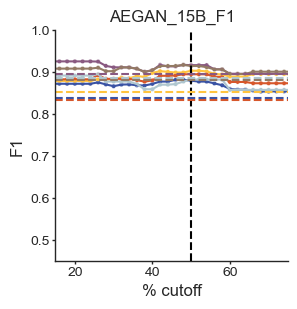

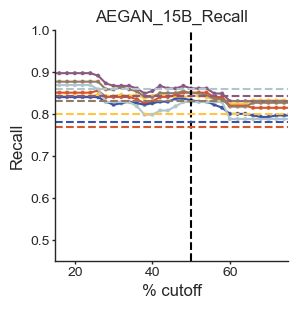

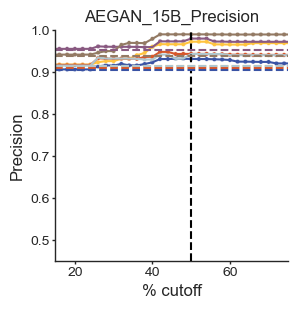

In [153]:
make_figure(df, x='% cutoff', y='F1', hue='Dataset', filename='AEGAN_15B_F1.svg')
make_figure(df, x='% cutoff', y='Recall', hue='Dataset', filename='AEGAN_15B_Recall.svg')
make_figure(df, x='% cutoff', y='Precision', hue='Dataset', filename='AEGAN_15B_Precision.svg')

In [150]:
df[df['% cutoff'] == 50]

,Dataset,% cutoff,F1,Precision,Recall,Support,% fully correct,% with difference,% missing,Mean correct
150,HA_superfamily,50,0.879079,0.930894,0.832727,275,0.750000,0.144737,0.105263,0.816338
151,EF_fold,50,0.916129,0.979310,0.860606,165,0.774194,0.107527,0.118280,0.836918
152,EF_family,50,0.902758,0.971875,0.842818,369,0.795918,0.127551,0.076531,0.855442
153,PC,50,0.881720,0.942529,0.828283,99,0.781818,0.127273,0.090909,0.842424
154,EF_superfamily,50,0.914005,0.989362,0.849315,219,0.804878,0.097561,0.097561,0.855691
155,NN,50,0.894309,0.942857,0.850515,194,0.796296,0.120370,0.083333,0.854167
